# Cleaning and Transforming Data

## Bringing in Data

* `pd.read_csv('./DOHMH_Dog_Bite_Data.csv')`
    * lots of options
    * https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
* `read_excel`
* `read_json`
* etc. (see book)

## Initial Exploration

* show: `head(n)`, `tail(n)`, `sample(n)`
* meta abt columns: `dtype`, `count()`, `info()`
* meta: `describe()`

## Working on Columns

* what data do we have? `dtype`
* count by types... but note, nan is considered float!?
    * `map(lambda x: type(x))`
* what are some actual values... value_counts()
* want to temporarily drop rows with a null in a column?
    * `tmp = df.dropna()`
* sort a Series by index:
    * `sort_index()`

## Altering Display Options

* `pd.option_context('display.max_rows', 500)`

## Work on Specific Columns

btw, bectorized methods / accessors on series:

* use `.dt` or `.str`
* call methods from there

conversions/handling columns

* numeric, but object or str
    * `astype('float64')`... but!!!!
    * map to use arbitrary functions like replace
        * note!!!! `na_action='ignore'`
    * use more sophisticated function (this is tricky)
    * `pd.to_numeric(series, errors='coerce')`
* date, `dt`
    * convert to datetime object
        * `pd.to_datetime(series, errors='coerce')`
    * test it out on a string first
        * `pd.to_datetime('January 02 2015	')`
    * convert all date objects to month name: `.dt.month_name()`
    * convert all date objects to month number `.dt.month`
    * to graph... w/ month names
        * `import calendar`
        * `list(calendar.month_abbr)[1:]` (starts with ''????)
        * pass all to xticks
* `str`
    * `.strip()`
        * `expand=True` to create a data frame
    * `.upper()`
    * `.split()`
    
## Data Set Questions


* what's the average age of the dogs in the data set? oldest, youngest 
    * let's check what the meta info has to say abt this
    * https://data.cityofnewyork.us/Health/DOHMH-Dog-Bite-Data/rsgh-akpg
    * ah... but what r the units??? IDK!!!! 🤔
* when is the worst time of year for dog bites? (so i can go out in bubble)?
* which breed, besides the obvious, are the bite-iest (er, let's do 2nd and / or 3rd place)

In [1]:
import pandas as pd
import numpy as np

## bring in csv data

Use `pd.read_csv`. It has sooo many options. See:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

The number of possible keyword arguments is dizzying! That's because it allows for lots of different options when importing a csv. Things like:

* skipping rows
* interpreting commas in numbers as thousands place
* determining whether or not dates should be automatically parsed
* etc. 

It does pretty well with no options too, though. Check out how we're able to parse this csv:

https://data.cityofnewyork.us/Health/DOHMH-Dog-Bite-Data/rsgh-akpg

(the direct url to the csv is: https://data.cityofnewyork.us/api/views/rsgh-akpg/rows.csv?accessType=DOWNLOAD)

Note that a url or file path can be used

In [2]:
# use a file on the local file system...
# df = pd.read_csv('./DOHMH_Dog_Bite_Data.csv')

# or download from url
df = pd.read_csv('https://data.cityofnewyork.us/api/views/rsgh-akpg/rows.csv?accessType=DOWNLOAD')

In [3]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3,M,True,Brooklyn,11238
1,2,January 02 2015,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,DOG,NaN,NaN,U,False,Brooklyn,NaN
3,4,January 01 2015,DOG,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221
4,5,January 03 2015,DOG,American Pit Bull Terrier/Pit Bull,1,M,False,Brooklyn,11207
...,...,...,...,...,...,...,...,...,...
10275,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
10276,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
10277,10278,December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
10278,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


## some steps for initially exploring data

1. how much data do we have?
1. view actual data, but can't do the whole thing!
    * first few rows - head
    * last few rows - title
    * some random rows - sample

Maybe see how many valid values (not null) each column has

* use `count`
* displays num of values per col
* does not include na

In [4]:
# looks like ~10,000 rows... ok!
df.count()

UniqueID      10280
DateOfBite    10280
Species       10280
Breed          8692
Age            5534
Gender        10280
SpayNeuter    10280
Borough       10280
ZipCode        7613
dtype: int64

What do these rows look like?

* `head` show first x number of rows
* `tail` show last x number of rows
* `sample` get random sampling of rows

In [5]:
df.head(3)

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3,M,True,Brooklyn,11238
1,2,January 02 2015,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,DOG,NaN,NaN,U,False,Brooklyn,NaN


In [6]:
df.tail(3)

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
10277,10278,December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
10278,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308
10279,10280,December 29 2017,DOG,BOXER/PIT BULL,NaN,M,False,Staten Island,10314


In [7]:
df.sample(5)

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
8044,8045,June 13 2016,DOG,NaN,NaN,U,False,Queens,NaN
9477,9478,May 20 2015,DOG,Rottweiler,NaN,U,False,Staten Island,NaN
8916,8917,July 09 2017,DOG,German Shepherd,3,M,False,Queens,11432
695,696,November 18 2015,DOG,Pit Bull,7,F,True,Brooklyn,11237
1728,1729,April 25 2017,DOG,Shih Tzu,NaN,U,False,Brooklyn,11211


From this, we can determine:

1. how much data are we dealing with 
    * 10,000 means it's obv not a data set where we can look at each individual row
    * we can prob just work with it in memory, tho 👍
2. what does the data look like?
    * it's at least, structured
    * and we can maybe infer the types that we have
    
Let's get some info about the columns:

* what does pandas think of each column?
* how about some quick summary statistics for all columns

In [8]:
# show the number of valid values per col
df.count()

UniqueID      10280
DateOfBite    10280
Species       10280
Breed          8692
Age            5534
Gender        10280
SpayNeuter    10280
Borough       10280
ZipCode        7613
dtype: int64

In [9]:
# show the types
df.dtypes

UniqueID       int64
DateOfBite    object
Species       object
Breed         object
Age           object
Gender        object
SpayNeuter      bool
Borough       object
ZipCode       object
dtype: object

Pretty much every field was expanded into an object. Oh well. 🤷‍️

Both `count()` and `dtypes` are useful... but you can get the same dataf using `info()`:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10280 entries, 0 to 10279
Data columns (total 9 columns):
UniqueID      10280 non-null int64
DateOfBite    10280 non-null object
Species       10280 non-null object
Breed         8692 non-null object
Age           5534 non-null object
Gender        10280 non-null object
SpayNeuter    10280 non-null bool
Borough       10280 non-null object
ZipCode       7613 non-null object
dtypes: bool(1), int64(1), object(7)
memory usage: 652.7+ KB


Right... sooo again, pretty much all columns have been widened to object even though the columns seem like they could have types. This will make describe / info / summary statistics available only on one field. Let's try:

* describe()

In [11]:
df.describe()

,UniqueID
count,10280.000000
mean,5140.500000
std,2967.724718
min,1.000000
25%,2570.750000
50%,5140.500000
75%,7710.250000
max,10280.000000


uhhh describe only works with unique id 

let's try going through each column and fixing it up... let's check out some values in each column:

Let's start with age. One thing we could do is used:

* value_counts

In [12]:
df['Age'].value_counts()

2         835
3         748
1         665
4         556
5         514
         ... 
1 & 8       1
1 & 3       1
13 YRS      1
6.5         1
3 & 4       1
Name: Age, Length: 153, dtype: int64

ack! that's too many values... 
how about we try to count the types

In [13]:
df['Age'].map(lambda x: type(x))

0          <class 'str'>
1        <class 'float'>
2        <class 'float'>
3          <class 'str'>
4          <class 'str'>
              ...       
10275      <class 'str'>
10276      <class 'str'>
10277      <class 'str'>
10278    <class 'float'>
10279    <class 'float'>
Name: Age, Length: 10280, dtype: object

In [14]:
df['Age'].map(lambda x: type(x)).value_counts()

<class 'str'>      5534
<class 'float'>    4746
Name: Age, dtype: int64

ugh... so we have strings and floats. 

Though... the floats are really np.nan!

In [15]:
# ok... so let's see all of theses floats
# and strings... first what's float?
df['Age'].notnull().value_counts()

True     5534
False    4746
Name: Age, dtype: int64

That looks pretty similar to the previous numbers. So, there are just a little over half valid values.

Let's see if we can fix up age first... let's see the ones that end in Y:

* let's avoid the null rows by making a temp dataframe
* then filter that by all the rows with an age that ends in Y
* finally, throw a value_counts on there

In [16]:
tmp = df[df['Age'].notnull()]
tmp['Age'][tmp['Age'].map(lambda age: age[-1] == 'Y')].value_counts()

2Y     27
3Y     24
1Y     20
4Y     16
6Y     15
5Y     13
10Y    10
12Y     7
8Y      7
9Y      6
13Y     4
11Y     3
7Y      1
Name: Age, dtype: int64

big question! are we talking dog years??? 🐕🤷‍♀️

* ... for the purposes of this demo, let's say years are _consistent_
* so, let's transform that everything that ends in Y to just a number

In [17]:
# set column to....
# same column... but for every value
# if it's a string and ends in Y then....
# here's one complicated way to do it:
df['Age'] = df['Age'].map(lambda age: age[:-1] if isinstance(age, str) and age[-1] == 'Y' else age)

In [18]:
df['Age'][df['Age'].map(lambda age: isinstance(age, str) and not age.isnumeric() and age[-1] == 'M')].value_counts()

8M            32
4M            31
10M           30
11M           28
3M            26
9M            22
5M            21
7M            20
6M            18
2M            12
3 M            4
1M             2
13M            2
10 M           2
16M            2
2-3M           1
4 M            1
7 M            1
14M            1
8YRS & 8 M     1
15M            1
18M            1
8 M            1
9 M            1
11 M           1
1/12M          1
Name: Age, dtype: int64

In [19]:
df['Age']

0          3
1        NaN
2        NaN
3          6
4          1
        ... 
10275      7
10276      5
10277    10M
10278    NaN
10279    NaN
Name: Age, Length: 10280, dtype: object

In [20]:
with pd.option_context('display.max_rows', 500):
    print(df['Age'].value_counts())

2                          862
3                          772
1                          685
4                          572
5                          527
6                          401
7                          325
8                          293
9                          173
10                         169
11                         104
12                          76
13                          61
14                          33
8M                          32
4M                          31
10M                         30
11M                         28
3M                          26
9M                          22
15                          22
5M                          21
7M                          20
6M                          18
16                          12
2M                          12
10 MTHS                      9
8 MTHS                       7
2 YRS                        7
9 MTHS                       7
11 MTHS                      6
7 MTHS                       6
2.5     

In [21]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3,M,True,Brooklyn,11238
1,2,January 02 2015,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,DOG,NaN,NaN,U,False,Brooklyn,NaN
3,4,January 01 2015,DOG,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221
4,5,January 03 2015,DOG,American Pit Bull Terrier/Pit Bull,1,M,False,Brooklyn,11207
...,...,...,...,...,...,...,...,...,...
10275,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
10276,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
10277,10278,December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
10278,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


It's a bit tricky to try to do that with all of the different perutations of age. Why don't we just create a named function that handles the following suffixes:

* M, MTHS, m for month
* Y, YRS, y for year

In [22]:
def normalize_age(age):
    if not isinstance(age, str) or age.isnumeric():
        return age
    
    month_endings = 'M', 'MTHS', 'm'
    year_endings = 'Y', 'YRS', 'y'
        
    # assume that endings are mutually exclusive
    for ending in month_endings + year_endings:
        
        # try to replace immediately
        n = age.replace(ending, '').strip()
        
        # if we end up with just a number, we know we have
        # either months or years
        if n.isnumeric():
            if ending in month_endings:
                return str(round(int(n)/12, 2))
            elif ending in year_endings:
                return n
    return age


In [23]:
normalize_age('11 YRS')

'11'

In [24]:
normalize_age('5M')

'0.42'

In [25]:
normalize_age(np.nan)

nan

In [26]:
normalize_age('3')

'3'

In [27]:
normalize_age('5Y 3M')

'5Y 3M'

In [28]:
with pd.option_context('display.max_rows', 500):
    tmp = df['Age'].map(normalize_age).value_counts()
    print(tmp)

2                          871
3                          776
1                          685
4                          578
5                          527
6                          405
7                          325
8                          295
9                          174
10                         172
11                         105
12                          76
13                          62
0.83                        41
0.67                        41
0.33                        40
0.92                        37
0.25                        35
14                          33
0.75                        32
0.58                        28
0.42                        24
15                          23
0.5                         22
0.17                        14
16                          12
2.5                          6
1 1/2 YRS                    4
17                           4
2018-04-05T00:00:00.000      4
1.5                          3
1 YR                         3
2018-03-

In [29]:
df['Age'] = df['Age'].map(normalize_age)

In [30]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3,M,True,Brooklyn,11238
1,2,January 02 2015,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,DOG,NaN,NaN,U,False,Brooklyn,NaN
3,4,January 01 2015,DOG,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221
4,5,January 03 2015,DOG,American Pit Bull Terrier/Pit Bull,1,M,False,Brooklyn,11207
...,...,...,...,...,...,...,...,...,...
10275,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
10276,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
10277,10278,December 21 2017,DOG,"Schnauzer, Miniature",0.83,M,True,Staten Island,10312
10278,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [31]:
with pd.option_context('display.max_rows', 500):
    print(df['Age'].value_counts())

2                          871
3                          776
1                          685
4                          578
5                          527
6                          405
7                          325
8                          295
9                          174
10                         172
11                         105
12                          76
13                          62
0.83                        41
0.67                        41
0.33                        40
0.92                        37
0.25                        35
14                          33
0.75                        32
0.58                        28
0.42                        24
15                          23
0.5                         22
0.17                        14
16                          12
2.5                          6
1 1/2 YRS                    4
17                           4
2018-04-05T00:00:00.000      4
1.5                          3
1 YR                         3
2018-03-

In [32]:
try: 
    # astype will throw errors if value
    # cannot be converted
    df['Age'].astype('float64')
except ValueError as e:
    print('error\n', e)

error
 could not convert string to float: '2-3M'


In [33]:
# instead, use to numeric with coerce in order to skip errors
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [34]:
df[df['Age'].notnull()]['Age'].value_counts()

2.00     871
3.00     776
1.00     685
4.00     578
5.00     527
6.00     405
7.00     325
8.00     295
9.00     174
10.00    172
11.00    105
12.00     76
13.00     62
0.67      41
0.83      41
0.33      40
0.92      37
0.25      35
14.00     33
0.75      32
0.58      28
0.42      24
15.00     23
0.50      22
0.17      14
16.00     12
2.50       6
17.00      4
1.50       3
1.33       2
1.60       2
1.30       2
0.08       2
3.50       2
1.08       2
4.60       2
10.50      1
0.60       1
21.00      1
2.60       1
15.50      1
3.60       1
19.00      1
1.80       1
1.83       1
41.00      1
1.25       1
4.50       1
6.50       1
1.17       1
0.20       1
Name: Age, dtype: int64

In [35]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3.00,M,True,Brooklyn,11238
1,2,January 02 2015,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,DOG,NaN,NaN,U,False,Brooklyn,NaN
3,4,January 01 2015,DOG,American Pit Bull Terrier/Pit Bull,6.00,M,False,Brooklyn,11221
4,5,January 03 2015,DOG,American Pit Bull Terrier/Pit Bull,1.00,M,False,Brooklyn,11207
...,...,...,...,...,...,...,...,...,...
10275,10276,December 24 2017,DOG,CHIWEENIE MIX,7.00,M,True,Staten Island,10303
10276,10277,December 24 2017,DOG,DUNKER,5.00,F,True,Staten Island,10303
10277,10278,December 21 2017,DOG,"Schnauzer, Miniature",0.83,M,True,Staten Island,10312
10278,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10280 entries, 0 to 10279
Data columns (total 9 columns):
UniqueID      10280 non-null int64
DateOfBite    10280 non-null object
Species       10280 non-null object
Breed         8692 non-null object
Age           5475 non-null float64
Gender        10280 non-null object
SpayNeuter    10280 non-null bool
Borough       10280 non-null object
ZipCode       7613 non-null object
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 652.7+ KB


In [37]:
df.describe()

,UniqueID,Age
count,10280.000000,5475.000000
mean,5140.500000,4.447803
std,2967.724718,3.286205
min,1.000000,0.080000
25%,2570.750000,2.000000
50%,5140.500000,4.000000
75%,7710.250000,6.000000
max,10280.000000,41.000000


In [38]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3.00,M,True,Brooklyn,11238
1,2,January 02 2015,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,DOG,NaN,NaN,U,False,Brooklyn,NaN
3,4,January 01 2015,DOG,American Pit Bull Terrier/Pit Bull,6.00,M,False,Brooklyn,11221
4,5,January 03 2015,DOG,American Pit Bull Terrier/Pit Bull,1.00,M,False,Brooklyn,11207
...,...,...,...,...,...,...,...,...,...
10275,10276,December 24 2017,DOG,CHIWEENIE MIX,7.00,M,True,Staten Island,10303
10276,10277,December 24 2017,DOG,DUNKER,5.00,F,True,Staten Island,10303
10277,10278,December 21 2017,DOG,"Schnauzer, Miniature",0.83,M,True,Staten Island,10312
10278,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [39]:
df['Species'].value_counts()

DOG    10280
Name: Species, dtype: int64

In [40]:
pd.to_datetime('January 02 2015	')

Timestamp('2015-01-02 00:00:00')

In [41]:
df['DateOfBite'] = pd.to_datetime(df['DateOfBite'])

In [42]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,2015-01-02,DOG,"Poodle, Standard",3.00,M,True,Brooklyn,11238
1,2,2015-01-02,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,2015-01-02,DOG,NaN,NaN,U,False,Brooklyn,NaN
3,4,2015-01-01,DOG,American Pit Bull Terrier/Pit Bull,6.00,M,False,Brooklyn,11221
4,5,2015-01-03,DOG,American Pit Bull Terrier/Pit Bull,1.00,M,False,Brooklyn,11207
...,...,...,...,...,...,...,...,...,...
10275,10276,2017-12-24,DOG,CHIWEENIE MIX,7.00,M,True,Staten Island,10303
10276,10277,2017-12-24,DOG,DUNKER,5.00,F,True,Staten Island,10303
10277,10278,2017-12-21,DOG,"Schnauzer, Miniature",0.83,M,True,Staten Island,10312
10278,10279,2017-12-28,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [43]:
df['DateOfBite'].dt.month_name().value_counts()

July         1069
August       1064
June          998
May           987
September     925
April         898
October       789
November      769
December      749
March         723
January       658
February      651
Name: DateOfBite, dtype: int64

In [44]:
df['DateOfBite'].dt.month.value_counts()

7     1069
8     1064
6      998
5      987
9      925
4      898
10     789
11     769
12     749
3      723
1      658
2      651
Name: DateOfBite, dtype: int64

In [45]:
counts = df['DateOfBite'].dt.month.value_counts()

In [46]:
counts = counts.sort_index()

In [47]:
counts

1      658
2      651
3      723
4      898
5      987
6      998
7     1069
8     1064
9      925
10     789
11     769
12     749
Name: DateOfBite, dtype: int64

In [48]:
import matplotlib.pyplot as plt
import calendar

([<matplotlib.axis.XTick at 0x7c25be9150>,
 <a list of 12 Text xticklabel objects>)

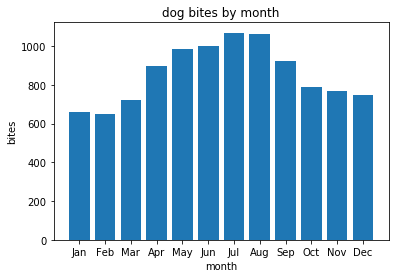

In [49]:
plt.bar(counts.index, counts.values, 0.8)
plt.ylabel('bites')
plt.xlabel('month')
plt.title('dog bites by month')
plt.xticks(counts.index, list(calendar.month_abbr)[1:])

In [50]:
import calendar

In [51]:
counts.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [52]:
df['Breed'].value_counts()

Pit Bull                                1921
Shih Tzu                                 364
American Pit Bull Terrier/Pit Bull       349
Chihuahua                                344
American Pit Bull Mix / Pit Bull Mix     340
                                        ... 
CHINESE SHEPERD                            1
SCHNAUZER/WHEATON MIX                      1
COOKAPOO                                   1
PEKINGESE/CHIHUAHUA                        1
ROTWEILLER/LABRADOR RETRIEVER              1
Name: Breed, Length: 1032, dtype: int64

In [53]:
df['Breed'] = df['Breed'].str.upper()

In [54]:
df['Breed'].value_counts()

PIT BULL                                    1927
SHIH TZU                                     365
AMERICAN PIT BULL TERRIER/PIT BULL           349
CHIHUAHUA                                    345
AMERICAN PIT BULL MIX / PIT BULL MIX         340
                                            ... 
GOLDEN DOODLE MIX                              1
BELGIAN SHEEPDOG                               1
PARSON RUSSELL TERRIER                         1
CHINESE TIEN YUN CHU                           1
WEST HIGHLAND TERRIER/ YORKSHIRE TERRIER       1
Name: Breed, Length: 1011, dtype: int64

In [55]:
df['Breed'] = df['Breed'].map(lambda name: name.replace('AMERICAN', '').strip() if isinstance(name, str) and name.startswith('AMERICAN') else name)

In [56]:
df['Breed'].value_counts()

PIT BULL                       1927
SHIH TZU                        365
PIT BULL TERRIER/PIT BULL       349
CHIHUAHUA                       345
PIT BULL MIX / PIT BULL MIX     340
                               ... 
LAB RETRIEVER/GERM SHEP           1
ENGLIH BULLDOG                    1
POODLE/SHIH TZU MIX               1
TERR & LAB                        1
GREAT DANE / HOUND MIX            1
Name: Breed, Length: 1004, dtype: int64

In [57]:
df['Breed'] = df['Breed'].str.strip()

In [58]:
df['Breed'].value_counts()

PIT BULL                       1927
SHIH TZU                        365
PIT BULL TERRIER/PIT BULL       349
CHIHUAHUA                       345
PIT BULL MIX / PIT BULL MIX     340
                               ... 
LAB RETRIEVER/GERM SHEP           1
ENGLIH BULLDOG                    1
POODLE/SHIH TZU MIX               1
TERR & LAB                        1
GREAT DANE / HOUND MIX            1
Name: Breed, Length: 1004, dtype: int64

In [59]:
df['Breed'].str.split('/').map(lambda names: names if isinstance(names, float) else len(names)).max()

3.0

In [60]:
breeds = df['Breed'].str.split('/', expand=True)

In [61]:
df['Primary Breed'] = breeds[0]

In [62]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,Primary Breed
0,1,2015-01-02,DOG,"POODLE, STANDARD",3.00,M,True,Brooklyn,11238,"POODLE, STANDARD"
1,2,2015-01-02,DOG,HUSKY,NaN,U,False,Brooklyn,11249,HUSKY
2,3,2015-01-02,DOG,NaN,NaN,U,False,Brooklyn,NaN,NaN
3,4,2015-01-01,DOG,PIT BULL TERRIER/PIT BULL,6.00,M,False,Brooklyn,11221,PIT BULL TERRIER
4,5,2015-01-03,DOG,PIT BULL TERRIER/PIT BULL,1.00,M,False,Brooklyn,11207,PIT BULL TERRIER
...,...,...,...,...,...,...,...,...,...,...
10275,10276,2017-12-24,DOG,CHIWEENIE MIX,7.00,M,True,Staten Island,10303,CHIWEENIE MIX
10276,10277,2017-12-24,DOG,DUNKER,5.00,F,True,Staten Island,10303,DUNKER
10277,10278,2017-12-21,DOG,"SCHNAUZER, MINIATURE",0.83,M,True,Staten Island,10312,"SCHNAUZER, MINIATURE"
10278,10279,2017-12-28,DOG,MIXED/OTHER,NaN,F,False,Staten Island,10308,MIXED


In [63]:
df['Primary Breed'] = df['Primary Breed'].str.strip()

In [64]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,Primary Breed
0,1,2015-01-02,DOG,"POODLE, STANDARD",3.00,M,True,Brooklyn,11238,"POODLE, STANDARD"
1,2,2015-01-02,DOG,HUSKY,NaN,U,False,Brooklyn,11249,HUSKY
2,3,2015-01-02,DOG,NaN,NaN,U,False,Brooklyn,NaN,NaN
3,4,2015-01-01,DOG,PIT BULL TERRIER/PIT BULL,6.00,M,False,Brooklyn,11221,PIT BULL TERRIER
4,5,2015-01-03,DOG,PIT BULL TERRIER/PIT BULL,1.00,M,False,Brooklyn,11207,PIT BULL TERRIER
...,...,...,...,...,...,...,...,...,...,...
10275,10276,2017-12-24,DOG,CHIWEENIE MIX,7.00,M,True,Staten Island,10303,CHIWEENIE MIX
10276,10277,2017-12-24,DOG,DUNKER,5.00,F,True,Staten Island,10303,DUNKER
10277,10278,2017-12-21,DOG,"SCHNAUZER, MINIATURE",0.83,M,True,Staten Island,10312,"SCHNAUZER, MINIATURE"
10278,10279,2017-12-28,DOG,MIXED/OTHER,NaN,F,False,Staten Island,10308,MIXED


In [65]:
df['Breed'].value_counts()

PIT BULL                       1927
SHIH TZU                        365
PIT BULL TERRIER/PIT BULL       349
CHIHUAHUA                       345
PIT BULL MIX / PIT BULL MIX     340
                               ... 
LAB RETRIEVER/GERM SHEP           1
ENGLIH BULLDOG                    1
POODLE/SHIH TZU MIX               1
TERR & LAB                        1
GREAT DANE / HOUND MIX            1
Name: Breed, Length: 1004, dtype: int64

In [66]:
df['Primary Breed'].value_counts()

PIT BULL               1978
SHIH TZU                401
PIT BULL MIX            379
CHIHUAHUA               369
PIT BULL TERRIER        355
                       ... 
PARSON RUSSELLTERR        1
WHITE POINT GRIFFON       1
COONHOUND X               1
TEACUP YORKSHIRE          1
                          1
Name: Primary Breed, Length: 637, dtype: int64

In [67]:
with pd.option_context('display.max_rows', 800):
    print(df['Primary Breed'].value_counts())

PIT BULL                                   1978
SHIH TZU                                    401
PIT BULL MIX                                379
CHIHUAHUA                                   369
PIT BULL TERRIER                            355
MIXED                                       312
GERMAN SHEPHERD                             285
YORKSHIRE TERRIER                           228
MALTESE                                     217
ROTTWEILER                                  169
UNKNOWN                                     169
LABRADOR RETRIEVER                          158
BULL DOG                                    124
JACK RUSS                                   117
SIBERIAN HUSKY                              117
POODLE, STANDARD                            111
COCKER SPANIEL                              105
BEAGLE                                       87
TERRIER                                      84
STAFFORDSHIRE TERRIER                        84
LABRADOR RETRIEVER CROSSBREED           